In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import scanpy as sc
import h5py

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [4]:
f = h5py.File(data_output_dir+'/outs/molecule_info.h5','r')

In [5]:
list(f.keys())

['barcode_idx',
 'barcode_info',
 'barcodes',
 'count',
 'feature_idx',
 'features',
 'gem_group',
 'library_idx',
 'library_info',
 'metrics_json',
 'umi',
 'umi_type']

In [6]:
df_f_molecule=pd.concat([pd.DataFrame(np.array(f['feature_idx'])),pd.DataFrame(np.array(f['umi_type']))],axis=1 )

In [7]:
df_f_molecule.columns=['feature_idx','umi_type']

In [8]:
table=pd.DataFrame({'count' : df_f_molecule.groupby( [ 'umi_type','feature_idx'] ).size()}).reset_index()

In [9]:
table_exonic=table[table.umi_type==1]
table_intronic=table[table.umi_type==0]

In [10]:
exon_intron_df=table_exonic.reset_index().merge(table_intronic,how="outer",left_on=["feature_idx"],right_on=["feature_idx"]).set_index('index')

In [11]:
exon_intron_df.columns=['umi_type_x','feature_idx','count_exon','umi_type_y','count_intron']

In [12]:
exon_intron_df['count_exon']=exon_intron_df['count_exon'].fillna(0)
exon_intron_df['count_intron']=exon_intron_df['count_intron'].fillna(0)

In [13]:
exon_intron_df[['count_exon','count_intron']].corr(method="spearman") 

,count_exon,count_intron
count_exon,1.000000,0.652882
count_intron,0.652882,1.000000


In [15]:
exon_intron_df[['count_exon','count_intron']].to_csv('SupFig1h.csv',header=True,index=False)

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


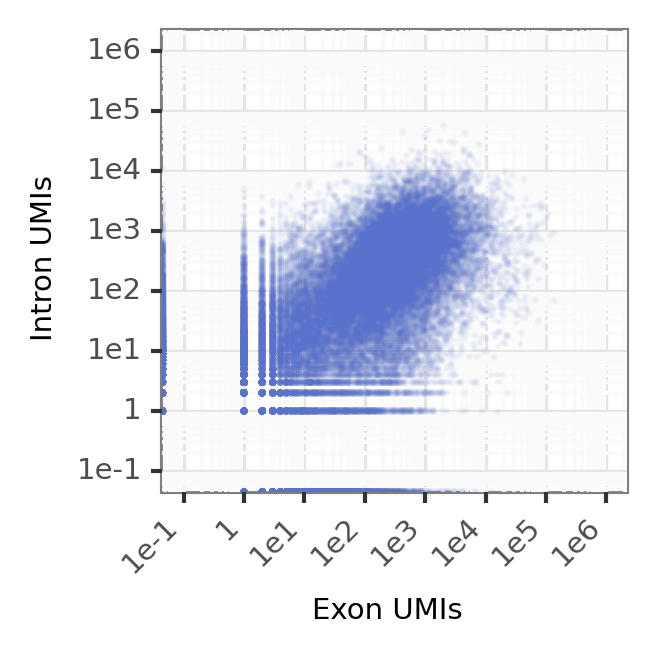

<ggplot: (2932121254274)>

In [14]:
plot=p9.ggplot(data=exon_intron_df,
               mapping=p9.aes(x='count_exon',y='count_intron')
              )
plot+ p9.geom_point(size=0.01,alpha=0.05,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.scale_y_log10(limits=[0.1,1000000],breaks=[0.1,1,10,100,1000,10000,100000,1000000]) \
+ p9.scale_x_log10(limits=[0.1,1000000],breaks=[0.1,1,10,100,1000,10000,100000,1000000]) \
+ p9.labels.ylab('Intron UMIs') \
+ p9.labels.xlab('Exon UMIs') \
+ p9.theme(figure_size=(2,2)) 

In [15]:
plot=p9.ggplot(data=exon_intron_df,
               mapping=p9.aes(x='count_exon',y='count_intron')
              )
pl=plot+ p9.geom_point(size=0.01,alpha=0.05,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.scale_y_log10(limits=[0.1,1000000],breaks=[0.1,1,10,100,1000,10000,100000,1000000]) \
+ p9.scale_x_log10(limits=[0.1,1000000],breaks=[0.1,1,10,100,1000,10000,100000,1000000]) \
+ p9.labels.ylab('Intron UMIs') \
+ p9.labels.xlab('Exon UMIs') \
+ p9.theme(figure_size=(2,2)) 
fig=pl.draw()
fig.set_size_inches(2, 2)
points = fig.axes[0].collections[0]
points.set_rasterized(True)
fig.savefig('ExonIntron_correlation.svg',format='svg',dpi=300,bbox_inches='tight')  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
